# "Hello PySpark!"

> Get up and running fast with a local pyspark installation, and learn the essentials of working with dataframes at scale.

- toc: flase
- image: images/guiones_wave.jpeg


![](nb_images/guiones_wave.jpeg "A big day at Playa Guiones.")

Well, you guessed it: it's time for us to learn pyspark!

I know, I know, I can hear you screaming into your pillow. Indeed we just spent all that time converting from R and learning python and why the hell do we need yet another API for working with dataframes?

That's a totally fair question.

So what happens when we're working on something in the real world, where datasets get large in a hurry, and we suddenly have a dataframe that no longer fits into memory?
We need a way for our computations and datasets to scale across multiple nodes in a distributed system without having to get too fussy about all the distributed compute details.

Enter PySpark.

I think it's fair to think of pyspark as a python package for working with arbitrarily large dataframes, i.e., it's like pandas but scalable.
It's built on top of [Apache Spark](https://spark.apache.org/), a unified analytics engine for large-scale data processing. 
[PySpark](https://spark.apache.org/docs/latest/api/python/)  is essentially a way to access the functionality of spark via python code. 
While there are other high-level interfaces to spark (such as Java, Scala, and R), for data scientists who are already working extensively with python, pyspark will be the natural interface of choice.
PySpark also has great integration with [SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html), and it has a companion machine learning library called [MLlib](https://spark.apache.org/mllib/) that's more or less a scalable scikit-learn.

So, here's the plan. 
First we're going to get set up to run pyspark locally in a jupyter notebook on our laptop.
This is my preferred environment for interactively playing with pyspark and learning the ropes.
Then we're going to get up and running in pyspark as quickly as possible by reviewing the most essential functionality for working with dataframes and comparing it to how we would do things in pandas.
Once we're comfortable running pyspark on the laptop, it's going to be much easier to jump onto a distributed cluster and run pyspark at scale.

Let's do this.

## How to Run PySpark in a Jupyter Notebook on Your Laptop

Ok, I'm going to walk us through how to get things installed on a Mac or Linux machine where we're using homebrew and conda to manage virtual environments.
If you have a different setup, your favorite search engine will help you get pyspark set up locally.

### Install Spark

Install Scala.

```
$ brew install scala
```

Install Spark.

```
$ brew install apache-spark
```

Check where spark is installed.
```
$ brew info apache-spark
apache-spark: stable 3.1.1, HEAD
Engine for large-scale data processing
https://spark.apache.org/
/usr/local/Cellar/apache-spark/3.1.2 (1,361 files, 242.6MB) *
...
```

Set the spark home environment variable to the path returned by `brew info` with `/libexec` appended to the end.
Don't forget to add the export to your `.zshrc` file too.

```
$ export SPARK_HOME=/usr/local/Cellar/apache-spark/3.1.2/libexec
```

Test the installation by starting the spark shell.

```
$ spark-shell
...
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.1.1
      /_/
         
Using Scala version 2.12.10 (OpenJDK 64-Bit Server VM, Java 14.0.1)
Type in expressions to have them evaluated.
Type :help for more information.

scala> 
```

If you get the `scala>` prompt, then you've successfully installed spark on your laptop!

### Install PySpark

Use conda to install the pyspark python package.
As usual, it's advisable to do this in a new virtual environment.


```
$ conda install pyspark
```

You should be able to launch an interactive pyspark REPL by saying pyspark.

```
$ pyspark
...
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.1.2
      /_/

Using Python version 3.8.3 (default, Jul  2 2020 11:26:31)
Spark context Web UI available at http://192.168.100.47:4041
Spark context available as 'sc' (master = local[*], app id = local-1624127229929).
SparkSession available as 'spark'.
>>> 
```

This time we get a familiar python `>>>` prompt.
This is an interactive shell where we can easily experiment with pyspark.
Feel free to run the example code in this post here in the pyspark shell, or, if you prefer a notebook, read on and we'll get set up to run pyspark in a jupyter notebook.

### The Spark Session Object

You may have noticed that when we launched that pyspark interactive shell, it told us that something called `SparkSession` was available as `'spark'`.
So basically, what's happening here is that when we launch the pyspark shell, it instantiates an object called `spark` which is an instance of class `pyspark.sql.session.SparkSession`.
The spark session object is going to be our entry point for all kinds of pyspark functionality, i.e., we're going to be saying things like `spark.this()` and `spark.that()` to make stuff happen. 

The pyspark interactive shell is kind enough to instantiate one of these spark session objects for us automatically.
However, when we're using another interface to pyspark (like say a jupyter notebook running a python kernal), we'll have to make a spark session object for ourselves.

### Create a PySpark Session in a Jupyter Notebook

There are a few ways to run pyspark in jupyter which you can read about [here](https://www.datacamp.com/community/tutorials/apache-spark-python).

For derping around with pyspark on your laptop, I think the best way is to instantiate a spark session from a  jupyter notebook running on a regular python kernal. 
The method we'll use involves running a standard jupyter notebook session with a python kernal and using the findspark package to initialize the spark session.
So, first install the findspark package.

```
$ conda install findspark
```

Launch jupyter as usual.

``` 
$ jupyter notebook
```


Go ahead and fire up a new notebook using a regular python 3 kernal.
Once you land inside the notebook, there are a couple things we need to do to get a spark session instantiated.
You can thing of this as boilerplate code that we need to run in the first cell of a notebook where we're going to use pyspark.

First import findspark and run its `init` method.

In [2]:
import findspark

findspark.init()

If you get errors, re-read the spark installation instructions above to make sure you correctly set the `SPARK_HOME` environment variable.

Next, import pyspark and instantiate a spark session.

In [3]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('My Spark App').getOrCreate()

Once you run this, you're ready to rock and roll with pyspark in your jupyter notebook.

Note that Spark provides a handy web UI that you can use for monitoring and debugging.
Once you instantiate the spark session You can open the UI in your web browser at [http://localhost:4040/jobs/](http://localhost:4040/jobs/).

## PySpark Concepts

PySpark provides two main abstractions for data: the RDD and the dataframe.
**RDD**'s are just a distributed list of objects; we won't go into details about them in this post.
For us, the key object in pyspark is the **dataframe**. 

While PySpark dataframes expose much of the functionality you would expect from a library for tabular data manipulation, they behave a little differently from pandas dataframes, both syntactically and under-the-hood.
There are a couple of key concepts that will help explain these idiosyncracies.

**Immutability** - Pyspark RDD's and dataframes are immutable. This means that if you change an object, e.g. by adding a column to a dataframe, pyspark returns a reference to a new dataframe; it does not modify the existing dataframe. This is kind of nice, because we don't have to worry about that whole [view versus copy](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy) nonsense that happens in pandas.

**Lazy Evaluation** - Lazy evaluation means that when we start manipulating a dataframe, pyspark won't actually perform any of the computations until we explicitly ask for the result. This is nice because it potentially allows pyspark to do fancy optimizations before executing a sequence of operations. It's also confusing at first, because pyspark will seem to blaze through complex operations and then take forever to print a few rows of the dataframe. 

## PySpark Dataframe Essentials

### Creating a PySpark dataframe with `createDataFrame()`

The first thing we'll need is a way to make dataframes.
[`createDataFrame()`](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.SparkSession.createDataFrame.html) allows us to create pyspark dataframes from python objects like nested lists or pandas dataframes.
Notice that `createDataFrame()` is a method of the spark session class, so we'll call it from our spark session `spark`by saying `spark.createDataFrame()`.

In [24]:

# create pyspark dataframe from nested  lists
my_df = spark.createDataFrame(
    data=[
        [2022, "tiger"],
        [2023, "rabbit"],
        [2024, "dragon"]
    ],
    schema=['year', 'animal']
)

Let's read the seaborn tips dataset into a pandas dataframe and then use it to create a pyspark dataframe.

In [5]:
import pandas as pd

# load tips dataset into a pandas dataframe
pandas_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# create pyspark dataframe from a pandas dataframe
pyspark_df = spark.createDataFrame(pandas_df)

> Note: In real life when we're running pyspark on a large-scale distributed system, we would not generally want to use python lists or pandas dataframes to load data into pyspark.  Ideally we would want to read data directly from where it is stored on HDFS, e.g. by reading [parquet files](https://spark.apache.org/docs/latest/sql-data-sources-parquet.html), or by querying directly from a hive database using [spark sql](https://spark.apache.org/docs/latest/sql-programming-guide.html).

### Peeking at a dataframe's contents

The default print method for the pyspark dataframe will just give you the schema.

In [6]:
pyspark_df

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint]

If we want to peek at some of the data, we'll need to use the `show()` method, which is analogous to the pandas `head()`.

In [7]:
pyspark_df.show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



We thus encounter our first rude awakening. 
PySpark's default representation of dataframes in the notebook isn't as pretty as that of pandas. 
But no one ever said it would be pretty, they just said it would be scalable.

You can also use the following alternatives to see the column names or schema.

In [8]:
# hide_output
# other ways to check out the column names and schema
pyspark_df.columns
pyspark_df.dtypes
pyspark_df.printSchema()

root
 |-- total_bill: double (nullable = true)
 |-- tip: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: long (nullable = true)



### Select columns by name

You can select specific columns from a dataframe using the [`select()`](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.select.html) method.
You can pass either a list of names, or pass names as arguments.

In [9]:
#hide_output
# select some of the columns
pyspark_df.select('total_bill', 'tip')

# select columns in a list
pyspark_df.select(['day', 'time', 'total_bill'])

DataFrame[day: string, time: string, total_bill: double]

### Filter rows based on column values

Analogous to the `WHERE` clause in SQL, and the `query()` method in pandas, pyspark provides a [`filter()`](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.filter.html) method which returns only the rows that meet the specified conditions.
Its argument is a string specifying the condition to be met for rows to be included in the result. You specify the condition as an expression involving the column names and comparison operators like <, >, <=, >=, == (equal), and ~= (not equal). You can specify compound expressions using and and or, and you can even a SQL-like `in` to check if the column value matches any items in a list.

In [10]:
#hide_output
## compare a column to a value
pyspark_df.filter('total_bill > 20')

# compare two columns with arithmetic
pyspark_df.filter('tip > 0.15 * total_bill')

# check equality with a string value
pyspark_df.filter('sex == "Male"')

# check equality with any of several possible values
pyspark_df.filter('day in ("Sat", "Sun")')

# use "and" 
pyspark_df.filter('day == "Fri" and time == "Lunch"')

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint]

If you're into boolean indexing with the brackets, pyspark does support that too, but I encourage you to use `filter()` instead. 
Check out my rant about [why you shouldn't use boolean indexing](https://blog.mattbowers.dev/8020-pandas-tutorial#Select--rows-based-on-their-values-with-query()) for the details.
The TLDR is that `filter()` requires less typing, makes your code more readable and portable, and it allows you to chain method calls together using dot chains.

Here's the boolean indexing equivalent of the last example from above.

In [11]:
#hide_output
# using boolean indexing
pyspark_df[(pyspark_df.day == 'Fri') & (pyspark_df.time == 'Lunch')]

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint]

I know, it looks horrendous, but not as horrendous as the error message you'll get if you forget the parentheses. :smiley:

### Add new columns to a dataframe

You can add new columns which are functions of the existing columns with the [`withColumn()`](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html) method. 

In [12]:
#hide_output
import pyspark.sql.functions as f

# add a new column using col() to reference other columns
pyspark_df.withColumn('tip_percent', f.col('tip') / f.col('total_bill'))

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint, tip_percent: double]

Notice that we've imported the [`pyspark.sql.functions`]([pyspark.sql.functions](https://spark.apache.org/docs/2.4.0/api/python/pyspark.sql.html#module-pyspark.sql.functions)) module. This module contains lots of useful functions that we'll be using all over the place, so it's probably a good idea to go ahead and import it whenever you're using pyspark.
BTW, it seems like folks usually import this module as `f` or `F`.
In this example we're using the `col()` function, which allows us to refer to columns in our dataframe using string representations of the column names.

You could also achieve the same result using the dot to reference the other columns, but this requires us to type the dataframe name over and over again, which makes it harder to reuse this code on different dataframes or in [dot chains](https://blog.mattbowers.dev/8020-pandas-tutorial#Chain-transformations-together-with-the-dot-chain).

In [13]:
#hide_output
# add a new column using the dot to reference other columns (less reccommended)
pyspark_df.withColumn('tip_percent', pyspark_df.tip / pyspark_df.total_bill)

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint, tip_percent: double]

If you want to apply numerical transformations like exponents or logs, use the built-in functions in the `pyspark.sql.functions` module.

In [14]:
#hide_output
# log 
pyspark_df.withColumn('log_bill', f.log(f.col('total_bill')))

# exponent
pyspark_df.withColumn('bill_squared', f.pow(f.col('total_bill'), 2))

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint, bill_squared: double]

You can implement conditional assignment like SQL's `CASE WHEN` construct using the `when()` function and the `otherwise()` method.

In [25]:
#hide_output
# conditional assignment (like CASE WHEN)
pyspark_df.withColumn('is_male', f.when(f.col('sex') == 'Male', True).otherwise(False))

DataFrame[total_bill: double, tip: double, sex: string, smoker: string, day: string, time: string, size: bigint, is_male: boolean]

Remember that since pyspark dataframes are immutable, calling `withColumns()` on a dataframe returns a new dataframe.
If you want to persist the result, you'll need to make an assignment.

```
pyspark_df = pyspark_df.withColumns(...)
```

### Group by and aggregate

PySpark provides a `groupBy()` method similar to the pandas `groupby()`.
Just like in pandas, we can call methods like `count()` and `mean()` on our grouped dataframe, and we also have a more flexible `agg()` method that allows us to specify column-aggregation mappings.

In [21]:

# group by and count
pyspark_df.groupBy('time').count().show()

+------+-----+
|  time|count|
+------+-----+
| Lunch|   68|
|Dinner|  176|
+------+-----+



In [22]:

# group by and specify column-aggregation mappings with agg()
pyspark_df.groupBy('time').agg({'total_bill': 'mean', 'tip': 'max'}).show()

+------+--------+------------------+
|  time|max(tip)|   avg(total_bill)|
+------+--------+------------------+
| Lunch|     6.7|17.168676470588235|
|Dinner|    10.0| 20.79715909090909|
+------+--------+------------------+



If you want to get fancier with your aggregations, it might just be easier to express them using hive syntax. read on to find out how.

### Run Hive SQL on dataframes

One of the mind-blowing features of pyspark is that it 
allows you to write hive SQL queries on your dataframes.
To take a pyspark dataframe into the SQL world, use the `createOrReplaceTempView()` method.
This method takes one string argument which will be the dataframes name in the SQL world.
Then you can use `spark.sql()` to run a query. 
The result is returned as a pyspark dataframe.

In [17]:

# put pyspark dataframe in SQL world and query it
pyspark_df.createOrReplaceTempView('tips')
spark.sql('select * from tips').show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



This is awesome for a couple of reasons. First, it allows us to easily express any transformations in hive syntax.
If you're like me and you've already been using hive, this will dramaticallyy reduce the pyspark learning curve, becausewhen in doubt, you can always bump a dataframe into the SQL world and simply use hive to do what you need.
Second, if you have a hive deployment, pyspark's SQL world also has access to all of your hive tables.
This means you can write queries involving both hive tables and your pyspark dataframes.
It also means you can run hive commands like inserting into a tabledirectly from pyspark.

Let's do some aggregations that might be a little trickier to do using the pyspark built-in functions.

In [18]:

# run hive query and save result to dataframe
tip_stats_by_time = spark.sql("""
    select
        time
        , count(*) as n 
        , avg(tip) as avg_tip
        , percentile_approx(tip, 0.5) as med_tip
        , avg(case when tip > 3 then 1 else 0 end) as pct_tip_gt_3
    from 
        tips
    group by 1
""")

tip_stats_by_time.show()

+------+---+------------------+-------+-------------------+
|  time|  n|           avg_tip|med_tip|       pct_tip_gt_3|
+------+---+------------------+-------+-------------------+
| Lunch| 68|2.7280882352941176|    2.2|0.27941176470588236|
|Dinner|176| 3.102670454545455|    3.0|0.44886363636363635|
+------+---+------------------+-------+-------------------+



## Visualization with PySpark

There aren't any tools for visualization included in pyspark.
But that's no problem, because we can just use the `toPandas()` method on a pyspark dataframe to pull data back into pandas.
Once we have a pandas dataframe, we can happily build visualizations as usual.
Of course, if your pyspark dataframe is huge, you wouldn't want to use `toPandas()` directly, because pyspark will attempt to read the entire contents of its huge dataframe into memory.
Instead, it's best to use pyspark to generate aggregations of your data for plotting or to pull only a sample of your full data into pandas.

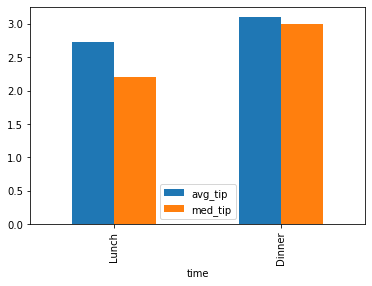

In [23]:

# read aggregated pyspark dataframe into pandas for plotting
plot_pdf = tip_stats_by_time.toPandas()
plot_pdf.plot.bar(x='time', y=['avg_tip', 'med_tip']);

## Wrapping Up

So that's a wrap on our crash course in working with pyspark.
 You now have a good idea of what pyspark is and how to get started manipulating dataframes with it. 
May no dataframe be too large for you ever again.